# 1 Initialisation

## 1.1 Imports

In [1]:
# Librairies pour le traitement des données
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques

from common_functions import *
from uni_bi_variate_functions import *
from multi_variate_functions import *

low_memory=False # faible mémoire vive (RAM)

## 1.3 Récupération du Data Set

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=low_memory) # , parse_dates=['created_datetime','last_modified_datetime'], infer_datetime_format=True)
# df = df.head(1000)

## Structure du data set

In [3]:
df.shape

(320772, 162)

In [4]:
print(df.columns.tolist())

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [5]:
df.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.


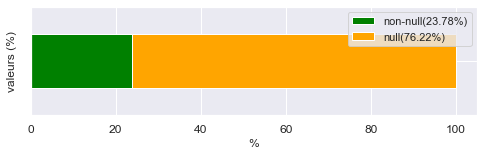

In [7]:
verifier_taille(df, False)


In [8]:
afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
14849,0018894705796,http://world-fr.openfoodfacts.org/produit/0018...,usda-ndb-import,1489071927,2017-03-09T15:05:27Z,1489071927,2017-03-09T15:05:27Z,"Kettle Corn, Sweet & Salty",NaN,NaN,NaN,NaN,"Big Y, Big Y Foods Inc.","big-y,big-y-foods-inc",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Popcorn, palm oil with preservative (tbhq), sa...",NaN,NaN,NaN,NaN,NaN,33 g (2 Tbsp),NaN,2.0,[ popcorn -> en:popcorn ] [ palm-oil-with-p...,"en:e319,en:e955","E319 - Butylhydroquinone tertiaire,E955 - Sucr...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2280.0,NaN,36.36,18.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,48.48,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,6.06,NaN,NaN,NaN,0.76962,0.303000,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
242438,3564700610558,http://world-fr.openfoodfacts.org/produit/3564...,autourdupc,1452966957,2016-01-16T17:55:57Z,1483281622,2017-01-01T14:40:22Z,Crackers Sésame & Pavot,NaN,100 g,"Sachet,Plastique,Etui,

# Cleanning

In [9]:
nans = nan_cols(df, 99.99)
nans

,Column,NaN_Count,NaN_Percent,Not_NaN_Count,Not_NaN_Percent
0,cities,320749,99.992830,23,0.007170
1,allergens_fr,320753,99.994077,19,0.005923
2,no_nutriments,320772,100.000000,0,0.000000
3,ingredients_from_palm_oil,320772,100.000000,0,0.000000
4,ingredients_that_may_be_from_palm_oil,320772,100.000000,0,0.000000
5,nutrition_grade_uk,320772,100.000000,0,0.000000
6,butyric-acid_100g,320772,100.000000,0,0.000000
7,caproic-acid_100g,320772,100.000000,0,0.000000
8,caprylic-acid_100g,320771,99.999688,1,0.000312
9,capric-acid_100g,320770,99.999377,2,0.000623


In [10]:
df = df.drop(columns=nans['Column'])
df.shape

(320772, 120)

In [11]:
len(df[df['code'].isnull()])

23

In [12]:
df = df[df['code'].notnull()]

In [13]:
# Transformation des colonnes dates
dates_t = ['created_t', 'last_modified_t']
for date in dates_t:
    df[date] = pd.to_datetime(df[date], unit='s')

In [14]:
# Suppression de colonnes non pertinentes
df = df.drop(columns=['created_datetime', 'last_modified_datetime'])

['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fructose_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'folates_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'copper_100g', 'selenium_100g']


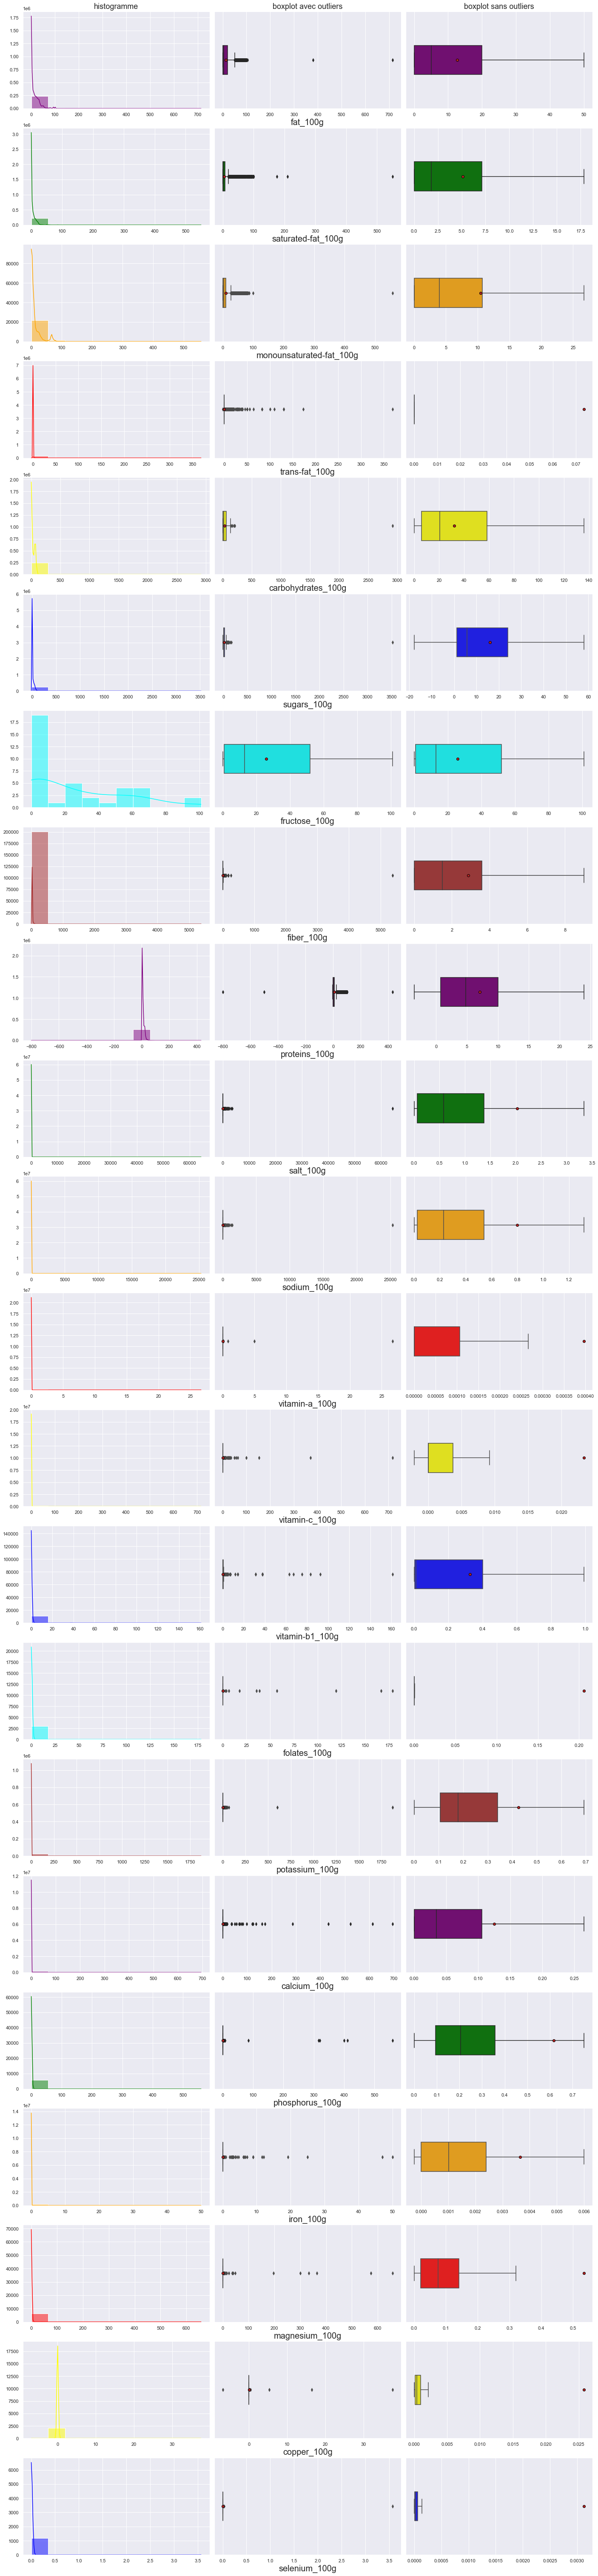

In [15]:
cols = colsOfType(df, ['float64','float32'])
outlier_cols = [col for col in cols if (df[col].max()>100 or df[col].min()<0) and col not in ['energy_100g', 'energy-from-fat_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']]
print(outlier_cols)

histo_distribution(df[outlier_cols], horizontal=False)

In [16]:
df[df['ph_100g']==0]

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
276432,5400141038330,http://world-fr.openfoodfacts.org/produit/5400...,teolemon,2014-08-10 13:12:09,2017-01-31 10:36:36,"Eau Minérale Naturelle, source &quot;Oiselle&q...",Eau minérale naturelle,"1,5 L","Bouteille,Plastique","bouteille,plastique","Boni,Colruyt","boni,colruyt","Boissons,Eaux,Eaux minérales,Boissons non sucrées","en:beverages,en:waters,en:mineral-waters,en:no...","Boissons,Eaux,Eaux minérales,Boissons non sucrées",France,france,"France,59230,Saint-Amand-les-Eaux","france,59230,saint-amand-les-eaux",Point Vert,en:green-dot,Point Vert,NaN,NaN,NaN,NaN,"France,Belgique",Spar,"Belgique,France","en:belgium,en:france","Belgique,France",Eau minérale naturelle source Oiselle.,NaN,NaN,NaN,NaN,1 L,0.0,[ eau-minerale-naturelle-source-oiselle -> fr...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:waters,Eaux,http://fr.openfoodfacts.org/images/products/54...,http://fr.openfoodfacts.org/images/products/54...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['ph_100g'] = df['ph_100g'].replace(0,7)

In [18]:
cols = colsOfType(df, ['float64','float32'])
cols = sorted([col for col in cols if '_100g' in col and col not in ['carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g','energy_100g', 'energy-from-fat_100g']])
print(cols)

['alcohol_100g', 'alpha-linolenic-acid_100g', 'beta-carotene_100g', 'bicarbonate_100g', 'biotin_100g', 'caffeine_100g', 'calcium_100g', 'carbohydrates_100g', 'chloride_100g', 'cholesterol_100g', 'cocoa_100g', 'collagen-meat-protein-ratio_100g', 'copper_100g', 'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g', 'fat_100g', 'fiber_100g', 'fluoride_100g', 'folates_100g', 'fructose_100g', 'fruits-vegetables-nuts_100g', 'iodine_100g', 'iron_100g', 'lactose_100g', 'linoleic-acid_100g', 'magnesium_100g', 'manganese_100g', 'monounsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'pantothenic-acid_100g', 'ph_100g', 'phosphorus_100g', 'polyols_100g', 'polyunsaturated-fat_100g', 'potassium_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'selenium_100g', 'silica_100g', 'sodium_100g', 'starch_100g', 'sucrose_100g', 'sugars_100g', 'trans-fat_100g', 'vitamin-a_100g', 'vitamin-b12_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-c

In [19]:
df_copy = df.copy()
for col in cols:
    # df = df_copy[((df_copy[col]>=0) & (df_copy[col]<=100)) | (df_copy[col].isnull())]
    df[col] = df[col].map(lambda x: np.nan if x<0 or x>100 else x)

In [20]:
nan_cols(df, 99.98)

,Column,NaN_Count,NaN_Percent,Not_NaN_Count,Not_NaN_Percent
0,eicosapentaenoic-acid_100g,320716,99.989712,33,0.010288
1,docosahexaenoic-acid_100g,320694,99.982853,55,0.017147
2,fructose_100g,320712,99.988465,37,0.011535
3,beta-carotene_100g,320715,99.989400,34,0.010600
4,silica_100g,320711,99.988153,38,0.011847
5,ph_100g,320700,99.984723,49,0.015277


In [21]:
len(df[df['carbon-footprint_100g'].notnull()])

268

In [22]:
df[cols].describe()

,alcohol_100g,alpha-linolenic-acid_100g,beta-carotene_100g,bicarbonate_100g,biotin_100g,caffeine_100g,calcium_100g,carbohydrates_100g,chloride_100g,cholesterol_100g,cocoa_100g,collagen-meat-protein-ratio_100g,copper_100g,docosahexaenoic-acid_100g,eicosapentaenoic-acid_100g,fat_100g,fiber_100g,fluoride_100g,folates_100g,fructose_100g,fruits-vegetables-nuts_100g,iodine_100g,iron_100g,lactose_100g,linoleic-acid_100g,magnesium_100g,manganese_100g,monounsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,pantothenic-acid_100g,ph_100g,phosphorus_100g,polyols_100g,polyunsaturated-fat_100g,potassium_100g,proteins_100g,salt_100g,saturated-fat_100g,selenium_100g,silica_100g,sodium_100g,starch_100g,sucrose_100g,sugars_100g,trans-fat_100g,vitamin-a_100g,vitamin-b12_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-c_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-pp_100g,zinc_100g
count,4133.000000,186.000000,34.000000,81.000000,307.000000,78.000000,141040.000000,243569.000000,158.000000,144090.000000,948.000000,165.000000,2105.000000,55.000000,33.000000,243887.000000,200881.000000,79.000000,3039.000000,37.000000,3036.000000,259.000000,140461.000000,262.000000,149.000000,6247.000000,1620.000000,22822.000000,841.000000,188.000000,2460.000000,49.000000,5840.000000,414.000000,22859.000000,24746.000000,259902.000000,255352.000000,229551.000000,1167.000000,38.000000,255429.000000,266.000000,72.000000,244952.000000,143289.000000,137553.000000,5.300000e+03,11153.000000,10815.000000,6784.000000,5240.000000,140863.000000,7057.000000,1340.000000,918.000000,11719.000000,3929.000000
mean,7.838105,2.250285,0.518715,0.119052,0.019628,1.594563,0.102023,32.055323,0.092638,0.020071,49.547785,15.412121,0.029083,0.742291,3.617545,12.725256,2.832473,0.012161,0.053283,23.867568,31.458587,0.000427,0.003653,6.354084,3.823819,0.146546,0.003014,10.401099,3.182103,16.229144,0.058991,6.568555,0.274337,49.790389,6.312493,0.324840,7.079837,1.588497,5.125925,0.003129,0.013123,0.647145,31.925000,11.841667,15.985449,0.067172,0.000397,8.938696e-05,0.311168,0.259007,0.023378,0.006898,0.014563,0.000008,0.056705,0.034219,0.014782,0.007950
std,10.959671,7.971418,2.561144,0.189486,0.342434,6.475588,0.585288,29.140680,0.149725,0.358062,18.757932,3.753028,0.901919,1.639335,14.927170,17.503695,4.588272,0.067952,1.449425,27.659367,31.967918,0.001285,0.214409,14.386132,6.494183,1.124804,0.028036,16.688625,5.607988,17.512632,1.462162,1.821947,1.148853,33.212338,10.832591,1.065723,8.156621,6.242531,7.913684,0.104548,0.040660,2.656343,24.704434,13.993859,21.165362,0.945020,0.073279,5.514738e-03,1.951304,1.277026,1.206822,0.335163,0.461423,0.000360,0.694039,1.031398,0.270975,0.080953
min,0.000000,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,6.000000,8.000000,0.000000,0.041000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.068750,0.001225,0.017320,0.000008,0.015500,0.000000,6.000000,0.001368,0.000000,32.000000,12.000000,0.000177,0.126000,0.200000,0.000000,0.000000,0.000018,0.000042,0.900000,0.000000,0.000015,0.000000,0.000000,0.437000,0.021000,0.000000,0.000000,0.600000,1.850000,0.000417,6.600000,0.094000,18.350000,0.000000,0.107000,0.700000,0.063500,0.000000,0.000005,0.001500,0.025000,4.500000,2.100000,1.300000,0.000000,0.000000,7.200000e-07,0.004000,0.002720,0.000255,0.000030,0.000000,0.000001,0.001800,0.000006,0.003077,0.001150
50%,5.000000,0.117500,0.005261,0.036000,0.000013,0.021000,0.035000,20.600000,0.014600,0.000000,50.000000,15.000000,0.000417,0.494000,0.533000,5.000000,1.500000,0.000060,0.000114,8.000000,23.000000,0.000034,0.001010,0.100000,0

In [23]:
afficher_echantillon(df)[['product_name','generic_name','ingredients_text','traces','traces_tags', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'additives_n', 'additives', 'additives_tags', 'main_category', 'main_category_fr', 'categories', 'categories_tags']]

Voici un sous-échantillon aléatoire :


,product_name,generic_name,ingredients_text,traces,traces_tags,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,additives_n,additives,additives_tags,main_category,main_category_fr,categories,categories_tags
108483,"Pasticceria Celli, Pandoro Italian Specialty Cake",NaN,"Wheat flour, eggs, sugar, butter entirely marg...",NaN,NaN,d,16.0,16.0,3.0,[ wheat-flour -> en:wheat-flour ] [ flour -...,"en:e322,en:e270,en:e201",NaN,NaN,NaN,NaN
93311,Amish Style Hand Made Egg Noodles,NaN,"Flour (malted barley flour potassium bromate),...",NaN,NaN,a,-1.0,-1.0,1.0,[ flour -> en:flour ] [ malted-barley-flour...,en:e924,NaN,NaN,NaN,NaN


# Travail sur les Catégories

In [24]:
working_category = 'main_category_fr' # 'categories_tags' #'main_category' # 'categories_fr' 'categories_tags'
df[working_category] = df[working_category].replace('', np.nan)
df = df[df[working_category].notnull()]

In [25]:
df[working_category] = df[working_category].map(lambda categorie : str(categorie).split(':')[-1].lower().replace('é','e') if categorie!=np.nan else '')

for j in range(2):
    allCategories = df[working_category].unique()
    allCategories =  [categorie for categorie in allCategories if categorie[:-1] not in allCategories and categorie[:-2] not in allCategories and categorie[:-3] not in allCategories]
    allCategories = sorted(list(set(allCategories)))

    for i in range (3,0,-1):
        df[working_category] = df[working_category].map(lambda categorie : categorie.split('-')[0] if categorie[:-i] not in allCategories else categorie[:-i].split('-')[0])

df[working_category] = df[working_category].replace('', np.nan)
df = df[df[working_category].notnull()]

In [26]:
# print(allCategories)

In [27]:
# print(sorted([categorie for categorie in allCategories if '-' not in categorie and ' ' not in categorie]))

In [28]:
afficher_echantillon(df)[[working_category]]

Voici un sous-échantillon aléatoire :


,main_category_fr
277667,boisson
289838,boisson


In [29]:
main_category = df[working_category].unique().tolist()
print(len(main_category), main_category[:10])

1656 ['filet', 'legumes frais', 'pâtisseries', 'pain', 'boulange', 'aliments et boissons à base de vegetaux', 'root', 'sable', 'plats prepares', 'volailles']


# Missing Values

## K-NN Imputation

In [30]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

cols = colsOfType(df, ['float64','float32'])

# Random Sampling
data = df[df['nutrition-score-fr_100g'].notnull()][cols]
data = data[~data.isnull().all(axis=1)]

data_size = len(data)
sample_size = min(data_size, 20000) #int(data_size*0.07)
print('Original data size:', data_size, 'Sample data size:', sample_size)


Original data size: 57780 Sample data size: 20000


In [31]:
sampled_data = data.copy()
stop = False
while not stop :
    sample = np.random.randint(data_size, size=sample_size)
    sampled_data = data.iloc[sample]
    stop = len(nan_cols(sampled_data, 100)) == 0

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(sampled_data), columns = sampled_data.columns, index=sampled_data.index)

knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
knn_imputer_transfom = knn_imputer.fit_transform(X)

X = pd.DataFrame(knn_imputer_transfom, columns = X.columns, index=X.index)

afficher_echantillon(X)[cols]

Voici un sous-échantillon aléatoire :


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
212635,0.000000,0.0,0.0,0.085967,0.070583,0.102,0.023232,0.050249,0.045012,0.049902,0.173439,0.514223,0.235529,0.015898,0.095407,0.005145,0.005004,0.004298,0.005,0.0,0.330788,0.001204,0.504645,0.234553,0.005000,0.232,0.0214,0.0214,0.0,0.000356,0.512807,0.041887,0.001472,0.034059,0.014453,0.000018,0.002032,0.003977,0.000010,0.000088,0.0,0.007852,0.005515,0.004114,0.0,0.230968,0.022183,0.117956,0.027135,0.035052,0.000169,0.002295,0.000912,0.013816,0.001357,0.006110,0.000523,0.012404,0.342829,0.5,0.120279,0.500087,0.624112,0.330329,0.574468,0.586957
225281,0.095238,0.0,0.0,0.137348,0.226412,0.310,0.211111,0.094891,0.083619,0.036280,0.119657,0.509376,0.293931,0.102632,0.143535,0.012612,0.003465,0.033000,0.033,0.0,0.295899,0.001349,0.070641,0.176232,0.000358,0.023,0.0011,0.0011,0.0,0.001125,0.442260,0.113753,0.001307,0.013035,0.017029,0.000013,0.004261,0.004875,0.000208,0.000055,0.0,0.004099,0.000642,0.001286,0.0,0.238281,0.011598,0.141991,0.027292,0.037096,0.000345,0.006714,0.000702,0.018893,0.001561,0.006704,0.091285,0.008086,0.352270,0.5,0.188798,0.498510,0.797316,0.396559,0.574468,0.586957


## Iterative Imputer

In [32]:
# # To use the experimental IterativeImputer, we need to explicitly ask for it:
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# cols = colsOfType(df, ['float64','float32'])

# # Random Sampling
# data = df[df['nutrition-score-fr_100g'].notnull()][cols]
# data = data[~data.isnull().all(axis=1)]


# data_size = len(data)
# sample_size = min(data_size, 5000) #int(data_size*0.07)
# print('Original data size:', data_size, 'Sample data size:', sample_size)

# sampled_data = data.copy()
# stop = False
# while not stop :
#     sample = np.random.randint(data_size, size=sample_size)
#     sampled_data = data.iloc[sample]
#     stop = len(nan_cols(sampled_data, 100)) == 0

# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(sampled_data), columns = sampled_data.columns, index=sampled_data.index)

# iter_imputer = IterativeImputer(random_state=0)
# iter_imputer_transfom = iter_imputer.fit_transform(X)

# X = pd.DataFrame(iter_imputer_transfom, columns = X.columns, index=X.index)

# afficher_echantillon(X)[cols]

# Analyse Explo

In [33]:
# histo_distribution(df, horizontal=False)

In [34]:
# correlation_matrix(df, 0.9)

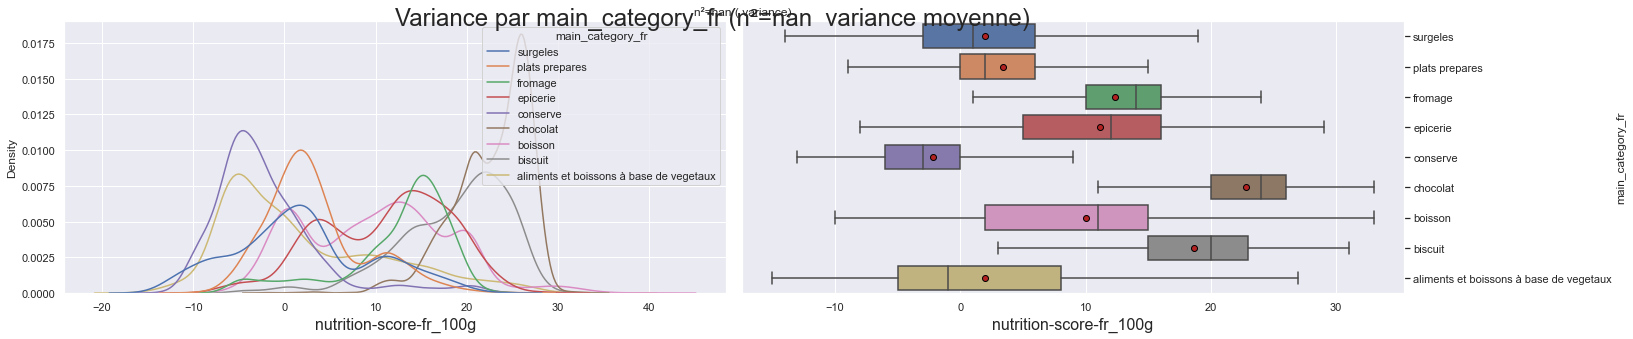

In [35]:
Q = working_category #qualitative
# print(df[Q].unique().tolist()[:20])
sub_Q = ['aliments et boissons à base de vegetaux','boisson','chocolat','conserve','biscuit','epicerie','plats prepares','surgeles','fromage'] 
# sub_Q = [q for q in df[Q].unique().tolist()[:20] if q != np.nan and  q != '']
ANOVA(df[df[Q].isin(sub_Q)], Q, ['nutrition-score-fr_100g'])

In [36]:
# print(df['countries_fr'].sort_values().unique().tolist()[:100])

# Q = 'countries_fr' #qualitative
# sub_Q = df[Q].unique().tolist()[:20]
# ANOVA(df[df[Q].isin(sub_Q)], Q, ['nutrition-score-fr_100g', 'carbon-footprint_100g'])

# Multi-variate

## PCA

63 ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g

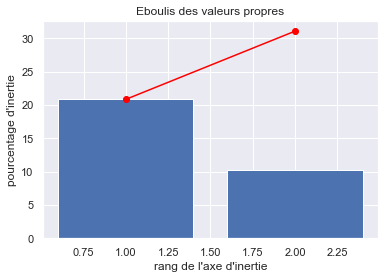

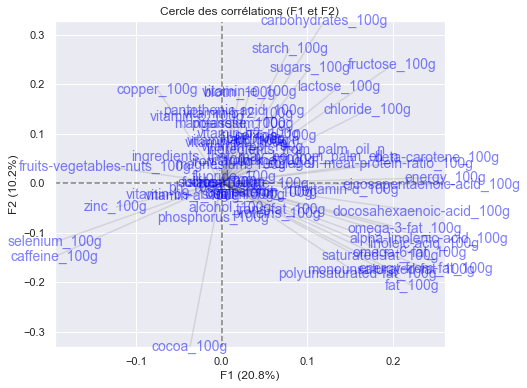

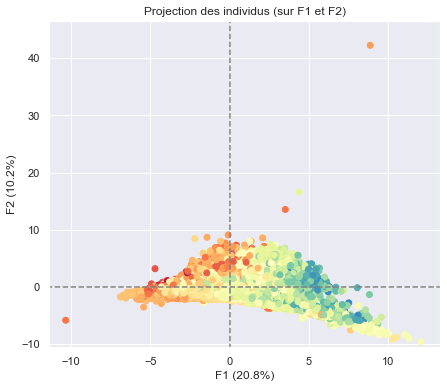

In [37]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 2, annotation='nutrition-score-fr_100g')

8 ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'trans-fat_100g']


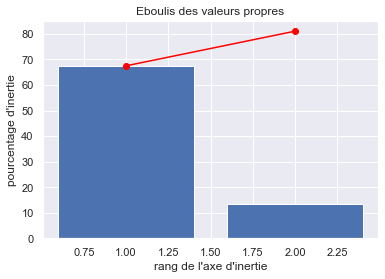

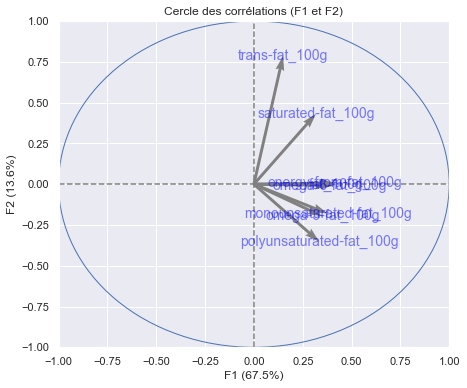

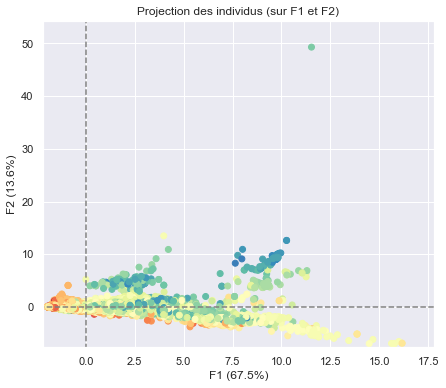

In [38]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 2, annotation='nutrition-score-fr_100g')

3 ['sucrose_100g', 'fructose_100g', 'lactose_100g']


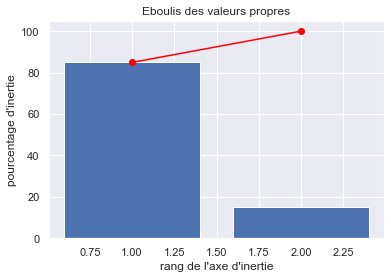

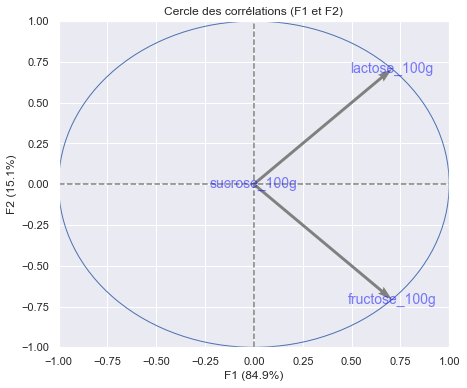

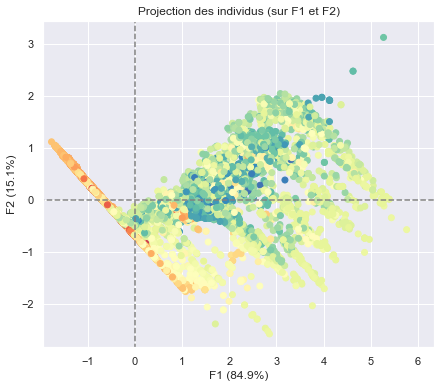

In [39]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 2, annotation='nutrition-score-fr_100g')

5 ['alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'linoleic-acid_100g', 'pantothenic-acid_100g']


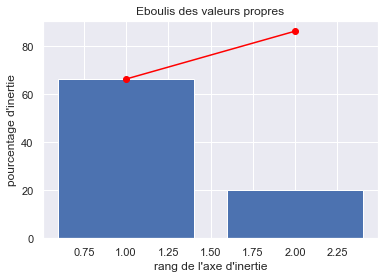

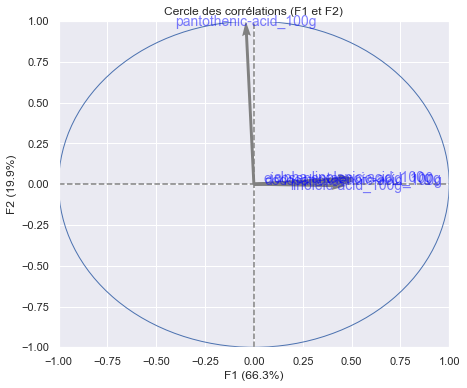

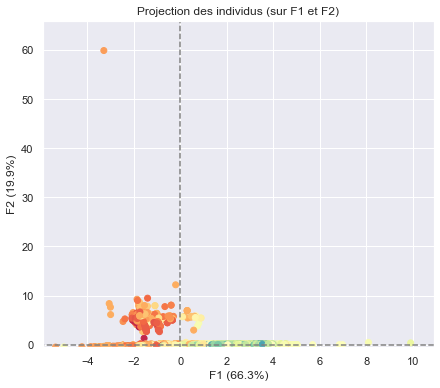

In [40]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'acid' in col]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 2, annotation='nutrition-score-fr_100g')

11 ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


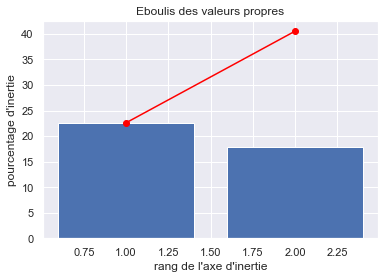

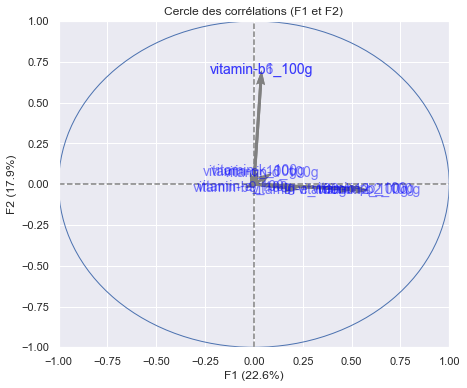

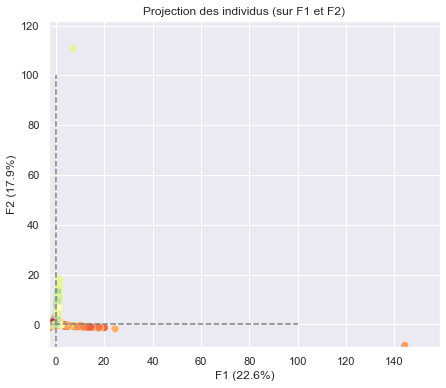

In [41]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 2, annotation='nutrition-score-fr_100g')

5 ['sodium_100g', 'potassium_100g', 'calcium_100g', 'magnesium_100g', 'selenium_100g']


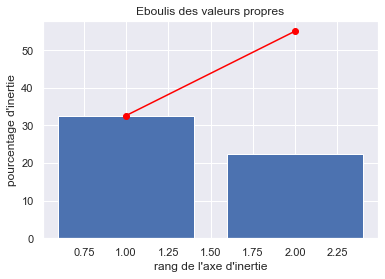

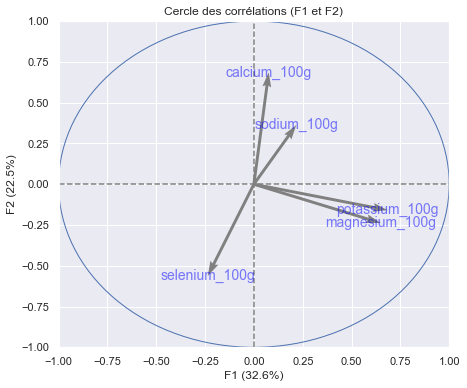

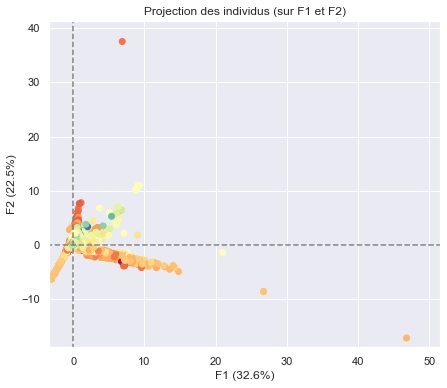

In [42]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ium' in col]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 2, annotation='nutrition-score-fr_100g')

31 ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'iodine_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


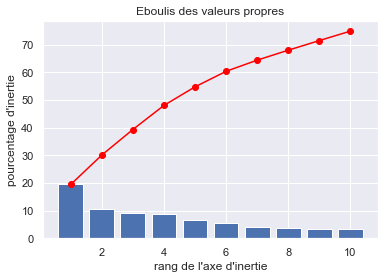

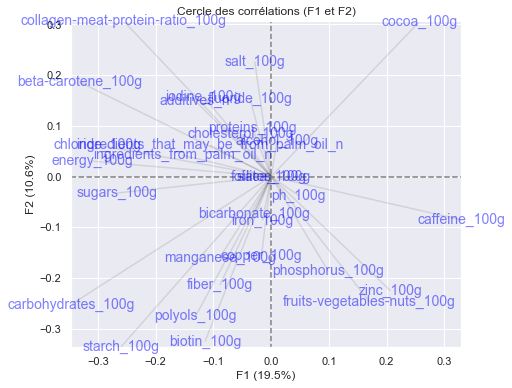

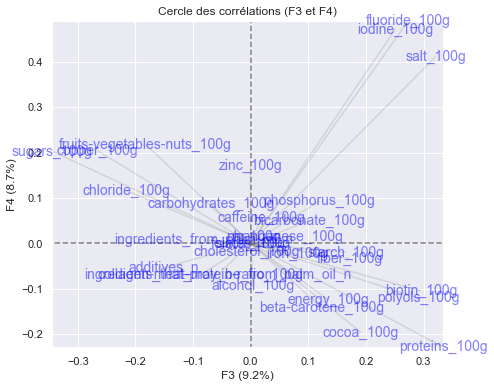

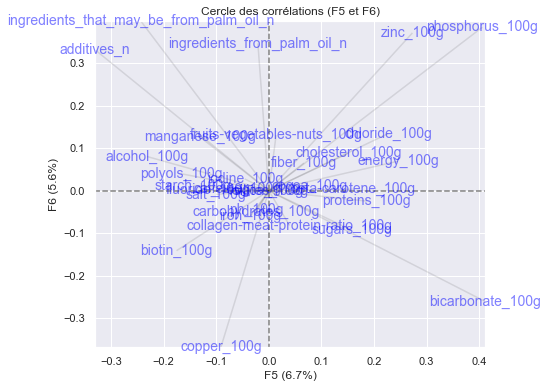

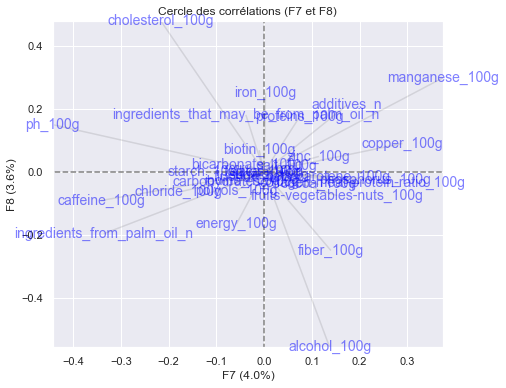

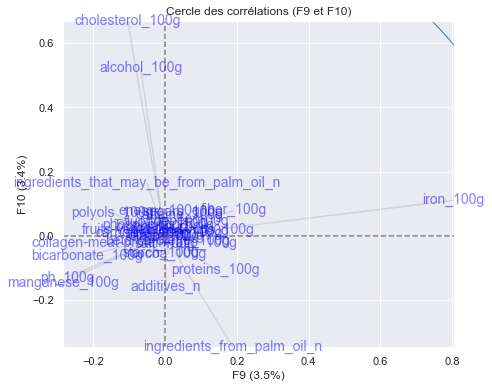

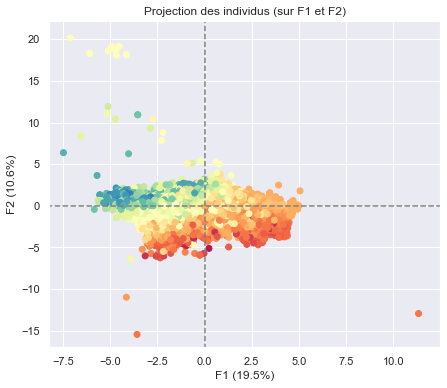

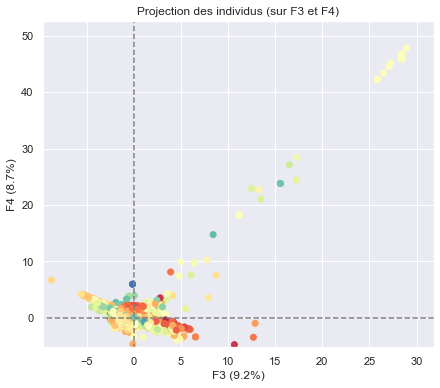

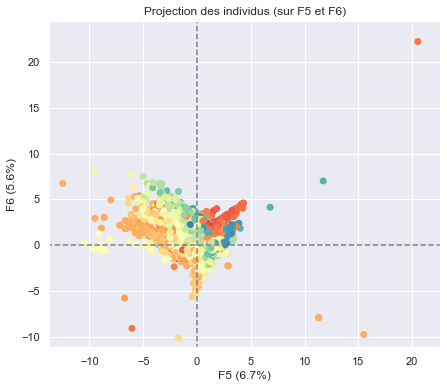

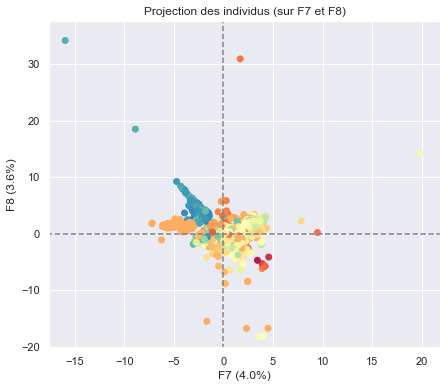

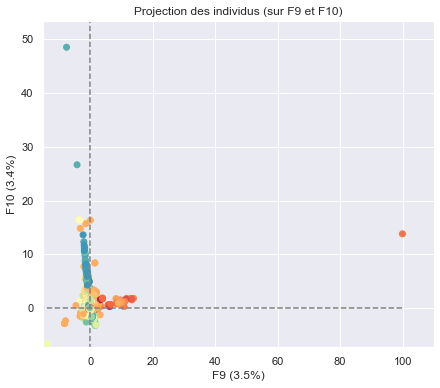

In [43]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col]
print(len(cols),cols[:100])

pcs = PCA(X, cols, 10, annotation='nutrition-score-fr_100g')

In [44]:
compressed = PCA_Compression(X, pcs, cols)
len(compressed)

20000

In [48]:
compressed['nutrition-score-fr_100g']=X['nutrition-score-fr_100g']
compressed

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,nutrition-score-fr_100g
287170,-0.092731,-0.142211,0.296117,-0.083061,0.168070,0.014616,-0.252966,0.006361,-0.196152,-0.094333,0.297872
288414,-0.719245,0.041440,-0.010985,-0.044796,0.174816,0.285618,-0.380192,-0.116766,-0.117754,-0.235010,0.553191
273785,-0.752872,-0.111635,0.018354,0.008601,0.227999,0.096986,-0.284411,-0.075044,-0.165413,-0.118849,0.468085
182304,0.144432,0.077937,0.148293,-0.054388,0.147567,-0.035618,-0.267586,-0.018393,-0.162468,-0.094524,0.340426
190122,0.033492,0.268396,0.072217,-0.074641,0.182878,-0.092281,-0.154280,-0.081423,-0.211469,-0.068114,0.404255
...,...,...,...,...,...,...,...,...,...,...,...
209704,-0.521857,-0.129083,0.240554,-0.110560,0.183963,-0.071889,-0.204915,-0.056528,-0.220806,-0.084496,0.425532
224633,-0.037773,0.342109,0.334033,-0.260218,0.327157,-0.043619,-0.119576,-0.018574,-0.175664,-0.118170,0.489362
178921,0.180620,-0.026544,-0.003393,0.059455,0.130976,0.045309,-0.144559,-0.022536,-0.152905,-0.090490,0.425532
226557,-0.714640,0.029795,0.046328,-0.028941,0.369998,-0.036903,-0.258120,-0.107001,-0.201803,-0.062427,0.765957


## K-Means

In [ ]:
# for col in cols:
#     df[col] = df[col].fillna(df[col].mean())
#     df[col] = df[col].apply(pd.to_numeric, errors='coerce')    

In [52]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 2000
data = compressed

# préparation des données pour le clustering
X = data.values
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X)



In [59]:
len(km_X.cluster_centers_ )


2000

In [60]:
centroids = km_X.cluster_centers_ 
centroids

array([[-0.51457553, -0.52451087,  0.39422548, ..., -0.24298495,
        -0.06480747,  0.18775663],
       [-0.24972062,  0.27618941,  0.08015355, ..., -0.20525793,
        -0.10880218,  0.54103343],
       [ 0.24083146, -0.12033031,  0.1258844 , ..., -0.14095315,
        -0.09006559,  0.08085106],
       ...,
       [-0.74516227,  0.14071931, -0.08790463, ..., -0.17989507,
        -0.03872188,  0.79027356],
       [-0.94104915,  0.07019622, -0.28741378, ..., -0.15855855,
        -0.08072619,  0.77446809],
       [-0.21509279,  0.36986644,  0.10842989, ..., -0.24110618,
        -0.11806394,  0.38829787]])

9.20160424238232


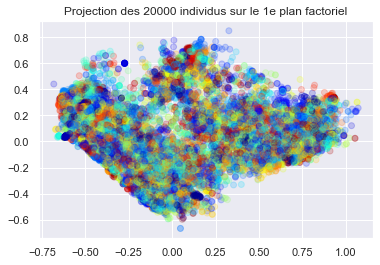

In [62]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
print(pca.score(X))
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

In [ ]:
# # Affichage du clustering par projection des individus sur le premier plan factoriel
# pca = decomposition.PCA(n_components=n_clust).fit(X)
# X_projected = pca.transform(X)
# plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df['nutrition-score-fr_100g'], cmap = 'jet', alpha=.2)
# plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
# plt.show(block=False)

## K-NN

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors


In [66]:
# Random Sampling
data = pd.DataFrame(centroids, columns=compressed.columns)
data_size = len(data)
sample_size = int(data_size*0.1) 
print('Original data size:', data_size, 'Sample data size:', sample_size)

sample = np.random.randint(data_size, size=sample_size)
sampled_data = data.iloc[sample]

Y = sampled_data['nutrition-score-fr_100g']
X = sampled_data[sampled_data.columns.tolist()[:-1]]
# Data Split 5 Trainning sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)



Original data size: 2000 Sample data size: 200


In [67]:
# K-NN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain, ytrain)
error = 1 - knn.score(xtest, ytest)

ValueError: Unknown label type: 'continuous'

## HC

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# cols = colsOfType(df, ['float64','float32'])

# # Random Sampling
# data = df[cols]
# data = data[~data.isnull().all(axis=1)]
# data_size = len(data)
# sample_size = int(data_size*0.02) 
# print('Original data size:', data_size, 'Sample data size:', sample_size)

# sample = np.random.randint(data_size, size=sample_size)
# sampled_data = data.iloc[sample]

sampled_data = X
# préparation des données pour le clustering
X = sampled_data.values
names = sampled_data.index

In [ ]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

In [ ]:
# Affichage du dendrogramme
# plot_dendrogram(Z, names)

In [ ]:
clusters = fcluster(Z, 5, criterion='maxclust')

In [ ]:
category = [df.loc[id, working_category] for id in sampled_data.index]

nutri_score = [df.loc[id, 'nutrition-score-fr_100g'] for id in sampled_data.index]


hc = pd.DataFrame({'category': category, 'nutri_score': nutri_score, 'cluster': clusters, 'product': names})
hc

In [ ]:
Col = 'nutri_score'
pt=hc.pivot_table(Col, columns='cluster', index='category',  aggfunc='sum', fill_value=0)
pt

In [ ]:
pt.sort_values(by=1, ascending=False).head(10)

In [ ]:
pt.sort_values(by=2, ascending=False).head(10)

In [ ]:
pt.sort_values(by=3, ascending=False).head(10)

In [ ]:
pt.sort_values(by=4, ascending=False).head(10)

In [ ]:
pt.sort_values(by=5, ascending=False).head(10)